In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# *Circuitos Elétricos I - Semana 12.1*

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from utils import round_expr, symdisp, symplot

from sympy.polys.partfrac import apart

# temp workaround
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False

In [3]:
# transformada de Laplace
def L(f,t,s):
    return sp.laplace_transform(f, t, s, noconds=True)

# transformada inversa de Laplace
def invL(F,s,t):
    return sp.re(sp.inverse_laplace_transform(F, s, t, noconds=True))

# funções para auxílio na expansão em frações parciais
def adjustCoeff(expr):    
    coeff = expr.as_numer_denom()
    c0 = sp.poly(coeff[1].cancel()).coeffs()[0]
    
    return (coeff[0].cancel()/c0)/(coeff[1].cancel()/c0)

def partFrac(expr, Ndigits):
    expr = expr.cancel()
    expr = apart(adjustCoeff(expr), s, full=True).doit()
    
    return sp.N(expr, Ndigits)

sp.init_printing()

#### Definindo algumas variáveis simbólicas de interesse

In [4]:
s     = sp.symbols('s')
a     = sp.symbols('a', real=True, positive=True)
omega, t = sp.symbols('omega, t', real=True)
infty = sp.oo

### Problema 1

O circuito da figura a seguir está em regime estacionário no momento em que chave é aberta. Sabe-se que $v(t)=\mathrm{12\;V}$.

<img src="./figures/J15C1.png" width="600">

a. Determine $I_0(s)$ e $I_1(s)$.\
b. Verifique a consistência das respostas do item a. com os teoremas do valor inicial e do valor final.\
c. Determine a função de transferência $H_0(s)$ entre $V(s)$ e $I_0(s)$.\
d. Determine a função de transferência $H_1(s)$ entre $V(s)$ e $I_1(s)$.\
e. Determine a função de transferência $H_c(s)$ entre $V(s)$ e $V_c(s)$.\
f. Determine a $v_c(t)$ para o caso em que a tensão aplicada $v(t)$ em $\mathrm{V}$ corresponde ao gráfico a seguir:

<img src="./figures/J15Fig1.png" width="400">

a. Determinando $I_0(s)$ e $I_1(s)$:

In [5]:
I0, I1, s = sp.symbols('I0, I1, s')

# define os sistema de equações
eq1 = sp.Eq((-2*s**2)*I0 + (2*s**2 + 10*s + 250)*I1, 2.4*s + 12)             
eq2 = sp.Eq((4*s+50)*I0 -2*s*I1, -2.4)  

# resolve o sistema
soluc = sp.solve([eq1, eq2],[I0, I1], dict=True)
soluc

I0 = [sol[I0] for sol in soluc]
I1 = [sol[I1] for sol in soluc]

I0 = I0[0]
I1 = I1[0]

print('Correntes no domínio de Laplace: \n')
symdisp('I_0(s) =', I0, 'As')
symdisp('I_1(s) =', I1, 'As')

Correntes no domínio de Laplace: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

b. Checando a consistência das soluções

**Teorema do valor inicial (TVI)**

$$
f(0^+) = \lim_{t \to 0^+}f(t) = \lim_{s \to \infty}sF(s)
$$


In [6]:
i0_0_tvi = sp.limit(s*I0, s, infty)
i1_0_tvi = sp.limit(s*I1, s, infty)


symdisp('i_0(0^+) = ', i0_0_tvi, ' A' )
symdisp('i_1(0^+) = ', i1_0_tvi, ' A' )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Teorema do valor final (TVF)**

$$
f(\infty) = \lim_{t \to \infty}f(t) = \lim_{s \to 0}sF(s)
$$



In [7]:
i0_inf_tvf = sp.limit(s*I0, s, 0)
i1_inf_tvf = sp.limit(s*I1, s, 0)


symdisp('i_0(\infty) = ', i0_inf_tvf, ' A' )
symdisp('i_1(\infty) = ', i1_inf_tvf, ' A' )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
C = 4e-3  # F

# Calculando Vc
Vc = (1/(s*C))*I1

Vc = Vc.simplify()

symdisp('V_c(s) =', adjustCoeff(Vc).simplify(), 'Vs')

<IPython.core.display.Math object>

In [9]:
 sp.limit(s*Vc, s, 0)

In [10]:
np.roots([1, 35, 375, 3125, 0])

array([-25. +0.j,  -5.+10.j,  -5.-10.j,   0. +0.j])

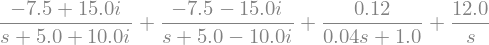

In [11]:
partFrac(Vc, 4)

In [12]:
vc = invL(partFrac(Vc, 4), s, t)

symdisp('v_c(t) = ', vc, ' V')

<IPython.core.display.Math object>

In [14]:
# plota funções no domínio do tempo
intervalo = np.arange(-1, 4, 0.01)
symplot(t, vc, intervalo, 'vc(t)')

NameError: name 'meijerg' is not defined

<Figure size 432x288 with 0 Axes>

c-e) Determinando $H_0(s)$, $H_0(s)$ e $H_c(s)$.

In [ ]:
V = 12/s

H0 = I0/V

symdisp('H_0(s) =', H0,)

<IPython.core.display.Math object>

In [ ]:
H1 = I1/V
H1 = adjustCoeff(H1)

symdisp('H_1(s) =', H1,)

<IPython.core.display.Math object>

In [ ]:
Hc = Vc/V
Hc = adjustCoeff(Hc)

symdisp('H_c(s) =', Hc,)

<IPython.core.display.Math object>

f. $v_c(t)=?$

<IPython.core.display.Math object>

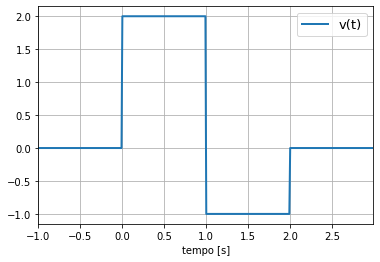

In [ ]:
v = 2*(sp.Heaviside(t)-sp.Heaviside(t-1)) - 1*(sp.Heaviside(t-1)-sp.Heaviside(t-2))

symdisp('v(t) =', v, ' V')

# plota funções no domínio do tempo
intervalo = np.arange(-1, 3, 0.01)
symplot(t, v, intervalo, 'v(t)')

In [ ]:
# determina Vc(s) via função de transferência
V = L(v, t, s)
Vc = Hc*V

symdisp('V_c(s) =', Vc.simplify(), ' Vs')

<IPython.core.display.Math object>

In [ ]:
# função auxiliar Va(s)
P = (25*s**2 + 875*s + 3125)/(s**4 + 35*s**3 + 375*s**2 + 3125*s)
P = partFrac(P, 10)

# encontra va(t)
p = invL(P, s, t)
p = p.expand()

symdisp('P(s) =', P , ' Vs')
symdisp('p(t) =', p, ' V')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
vc = 2*p - 3*p.subs({t:sp.UnevaluatedExpr(t-1)}) + p.subs({t:sp.UnevaluatedExpr(t-2)})

symdisp('v_c(t) =', vc, ' V')

<IPython.core.display.Math object>

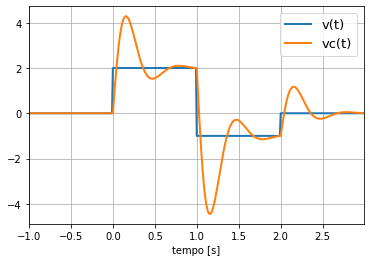

In [ ]:
# plota funções no domínio do tempo
intervalo = np.arange(-1, 3, 0.01)
symplot(t, [v, vc], intervalo, ['v(t)','vc(t)'])